In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('time-series-19-covid-combined.csv', parse_dates=True)

In [3]:
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32307 entries, 0 to 32306
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            32307 non-null  object 
 1   Country/Region  32307 non-null  object 
 2   Province/State  9922 non-null   object 
 3   Lat             32307 non-null  float64
 4   Long            32307 non-null  float64
 5   Confirmed       32186 non-null  float64
 6   Recovered       30613 non-null  float64
 7   Deaths          32186 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.0+ MB


In [5]:
# Setting the 'Date' datetime datatype
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32307 entries, 0 to 32306
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            32307 non-null  datetime64[ns]
 1   Country/Region  32307 non-null  object        
 2   Province/State  9922 non-null   object        
 3   Lat             32307 non-null  float64       
 4   Long            32307 non-null  float64       
 5   Confirmed       32186 non-null  float64       
 6   Recovered       30613 non-null  float64       
 7   Deaths          32186 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 2.0+ MB


In [7]:
#data cleaning
data.drop(columns=['Province/State','Lat', 'Long'], inplace=True)

In [8]:
data['current_cases'] = data['Confirmed'] - data['Recovered'] - data['Deaths']

In [9]:
nga_query = data[data['Country/Region'] == 'Nigeria']
nga_df = nga_query[['Date', 'Confirmed', 'Deaths', 'Recovered','current_cases']]

Text(0, 0.5, 'Cummulative')

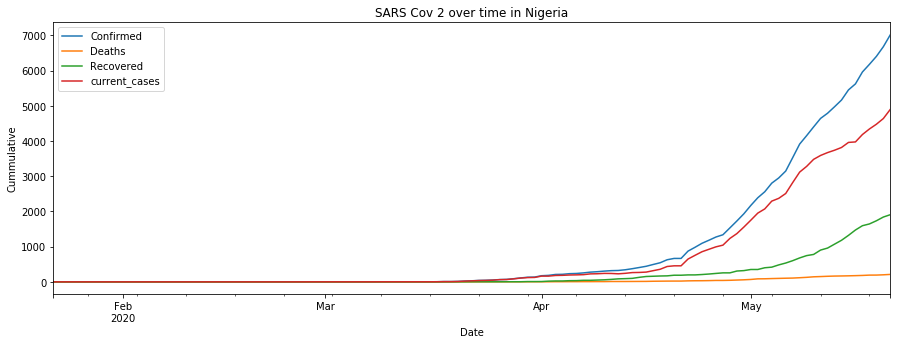

In [10]:
nga_df.plot(x='Date',figsize=(15,5), title='SARS Cov 2 over time in Nigeria')
plt.ylabel('Cummulative')
#plt.savefig('SARS Cov 2 over time in Nigeria.png')

In [11]:
nga_df.describe()

,Confirmed,Deaths,Recovered,current_cases
count,121.000000,121.000000,121.000000,121.000000
mean,952.165289,29.553719,206.917355,715.694215
std,1787.997061,55.990021,429.540871,1313.917906
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,2.000000,28.000000
75%,665.000000,22.000000,188.000000,455.000000
max,7016.000000,211.000000,1907.000000,4898.000000


In [12]:
nga_df.corr()

,Confirmed,Deaths,Recovered,current_cases
Confirmed,1.000000,0.998813,0.979816,0.997933
Deaths,0.998813,1.000000,0.973426,0.998356
Recovered,0.979816,0.973426,1.000000,0.964951
current_cases,0.997933,0.998356,0.964951,1.000000


In [13]:
nga_df.isnull().sum()

Date             0
Confirmed        0
Deaths           0
Recovered        0
current_cases    0
dtype: int64

In [14]:
from statsmodels.tsa.stattools import adfuller

In [16]:
recovered = nga_df[['Date', 'Recovered']]
death = nga_df[['Date', 'Deaths']]
confirmed = nga_df[['Date', 'Confirmed']]
current_cases = nga_df[['Date', 'current_cases']]                   

In [17]:
def adfuller_test(dataframe, feature):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(dataframe[feature], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)    

In [18]:
# adfuller test for Recovered
adfuller_test(recovered, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                   3.743812
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [19]:
# adfuller test for Confirmed
adfuller_test(confirmed, 'Confirmed')

Results of Dickey-Fuller Test:
Test Statistic                   4.120074
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [20]:
# adfuller test for Deaths
adfuller_test(death, 'Deaths')

Results of Dickey-Fuller Test:
Test Statistic                  -1.388626
p-value                          0.587716
#Lags Used                       8.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


In [21]:
# adfuller test for Deaths
adfuller_test(current_cases, 'current_cases')

Results of Dickey-Fuller Test:
Test Statistic                   3.773660
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [ ]:
nga_df_statn1_temp = nga_df["Data"]
nga_df_statn1_temp.concat()

In [51]:
recovered_1 = nga_df_statn1[['Date', 'Recovered']]
death_1 = nga_df_statn1[['Date', 'Deaths']]
confirmed_1 = nga_df_statn1[['Date', 'Confirmed']]
current_cases_1 = nga_df_statn1[['Date', 'current_cases']]                   

KeyError: "['Date'] not in index"

In [49]:
recovered.head()

,Date,Recovered
23595,2020-01-22,0.0
23596,2020-01-23,0.0
23597,2020-01-24,0.0
23598,2020-01-25,0.0
23599,2020-01-26,0.0


Text(0, 0.5, 'Cummulative')

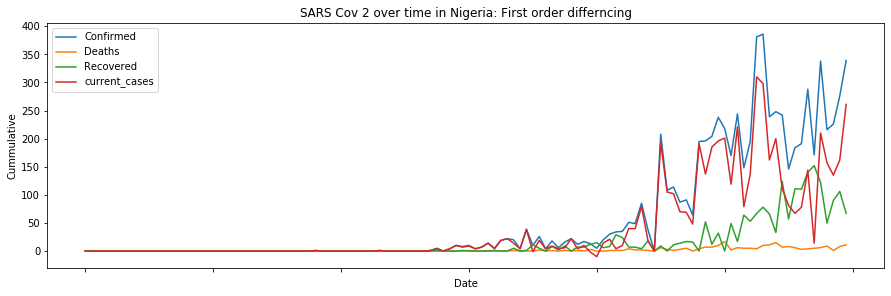

In [24]:
nga_df_statn1.plot(x='Date',figsize=(15,5), title='SARS Cov 2 over time in Nigeria: First order differncing')
plt.ylabel('Cummulative')
# plt.savefig('SARS Cov 2 over time in Nigeria.png')

In [25]:
# adfuller test for Recovered
adfuller_test(recovered_1, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                  -2.315789
p-value                          0.166926
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [26]:
# adfuller test for Confirmed
adfuller_test(confirmed_1, 'Confirmed')

Results of Dickey-Fuller Test:
Test Statistic                   1.088680
p-value                          0.995119
#Lags Used                       5.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64


In [27]:
# adfuller test for Deaths
adfuller_test(death_1, 'Deaths')

Results of Dickey-Fuller Test:
Test Statistic                  -0.165074
p-value                          0.942559
#Lags Used                       8.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -2.887952
Critical Value (10%)            -2.580857
dtype: float64


In [28]:
# adfuller test for Deaths
adfuller_test(current_cases_1, 'current_cases')

Results of Dickey-Fuller Test:
Test Statistic                  -0.344674
p-value                          0.918935
#Lags Used                       5.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64


In [29]:
#First differencing for stationarity
nga_df_statn2 = nga_df.diff().diff().dropna()

In [30]:
recovered_2 = nga_df_statn2[['Date', 'Recovered']]
death_2 = nga_df_statn2[['Date', 'Deaths']]
confirmed_2 = nga_df_statn2[['Date', 'Confirmed']]
current_cases_2 = nga_df_statn2[['Date', 'current_cases']]                   

Text(0, 0.5, 'Cummulative')

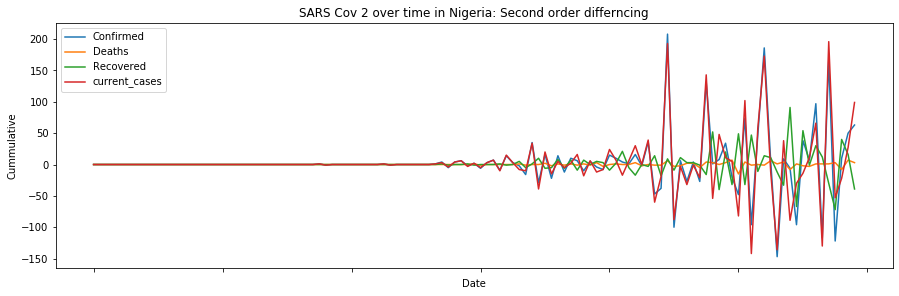

In [31]:
nga_df_statn2.plot(x='Date',figsize=(15,5), title='SARS Cov 2 over time in Nigeria: Second order differncing')
plt.ylabel('Cummulative')
# plt.savefig('SARS Cov 2 over time in Nigeria.png')

In [32]:
# adfuller test for Recovered
adfuller_test(recovered_2, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                  -2.532170
p-value                          0.107842
#Lags Used                      13.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [33]:
# adfuller test for Confirmed
adfuller_test(confirmed_2, 'Confirmed')

Results of Dickey-Fuller Test:
Test Statistic                -8.703081e+00
p-value                        3.763137e-14
#Lags Used                     4.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64


In [34]:
# adfuller test for Deaths
adfuller_test(death_2, 'Deaths')

Results of Dickey-Fuller Test:
Test Statistic                -5.758568e+00
p-value                        5.742955e-07
#Lags Used                     7.000000e+00
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64


In [35]:
# adfuller test for Deaths
adfuller_test(current_cases_2, 'current_cases')

Results of Dickey-Fuller Test:
Test Statistic                  -4.284026
p-value                          0.000473
#Lags Used                      13.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


### TO get p and q values, you have to plot acf and pacf plots

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

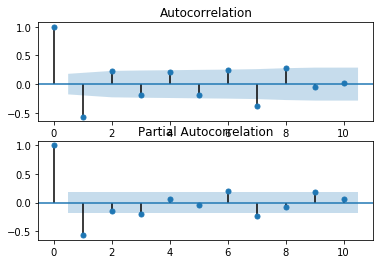

In [41]:
plt.figure()
plt.subplot(211)
plot_acf(recovered_2["Recovered"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(recovered_2["Recovered"], ax=plt.gca(), lags = 10)
plt.show()

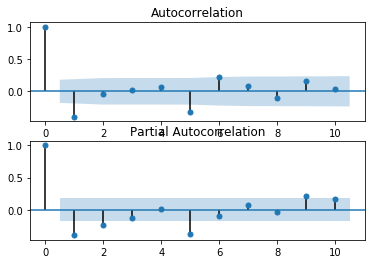

In [42]:
plt.figure()
plt.subplot(211)
plot_acf(confirmed_2["Confirmed"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(confirmed_2["Confirmed"], ax=plt.gca(), lags = 10)
plt.show()

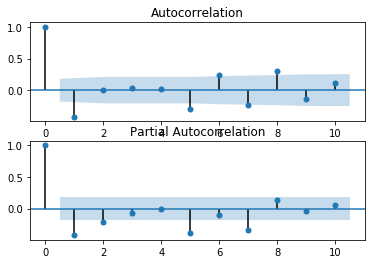

In [43]:
plt.figure()
plt.subplot(211)
plot_acf(death_2["Deaths"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(death_2["Deaths"], ax=plt.gca(), lags = 10)
plt.show()

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(current_cases_2["current_cases"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(d["Deaths"], ax=plt.gca(), lags = 10)
plt.show()